# Final Project : Classification of Air Quality

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Data, Basic Visualizations, & Preprocessing

In [74]:
from typing import List, Dict, Tuple, Callable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [76]:
# Kaggle dataset loaded into dataframe
dataset_path = "updated_pollution_dataset.csv"
pollution_df = pd.read_csv(dataset_path)

In [27]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [28]:
# The Data
pollution_df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

In [29]:
print(pollution_df.columns)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')


In [30]:
# Checking for nulls
print(pollution_df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [31]:
# Air Quality is the target value
pollution_df['Air Quality'].unique() 

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

<Axes: title={'center': 'Air Quality Levels Distribution'}, xlabel='Air Quality'>

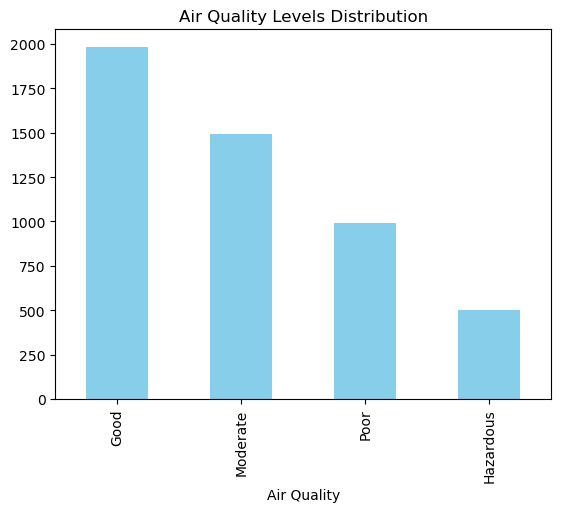

In [33]:
# Bar Graph of Air Quality Distribution
pollution_df['Air Quality'].value_counts().plot(kind='bar', title='Air Quality Levels Distribution', color='skyblue')

<Figure size 1500x1000 with 0 Axes>

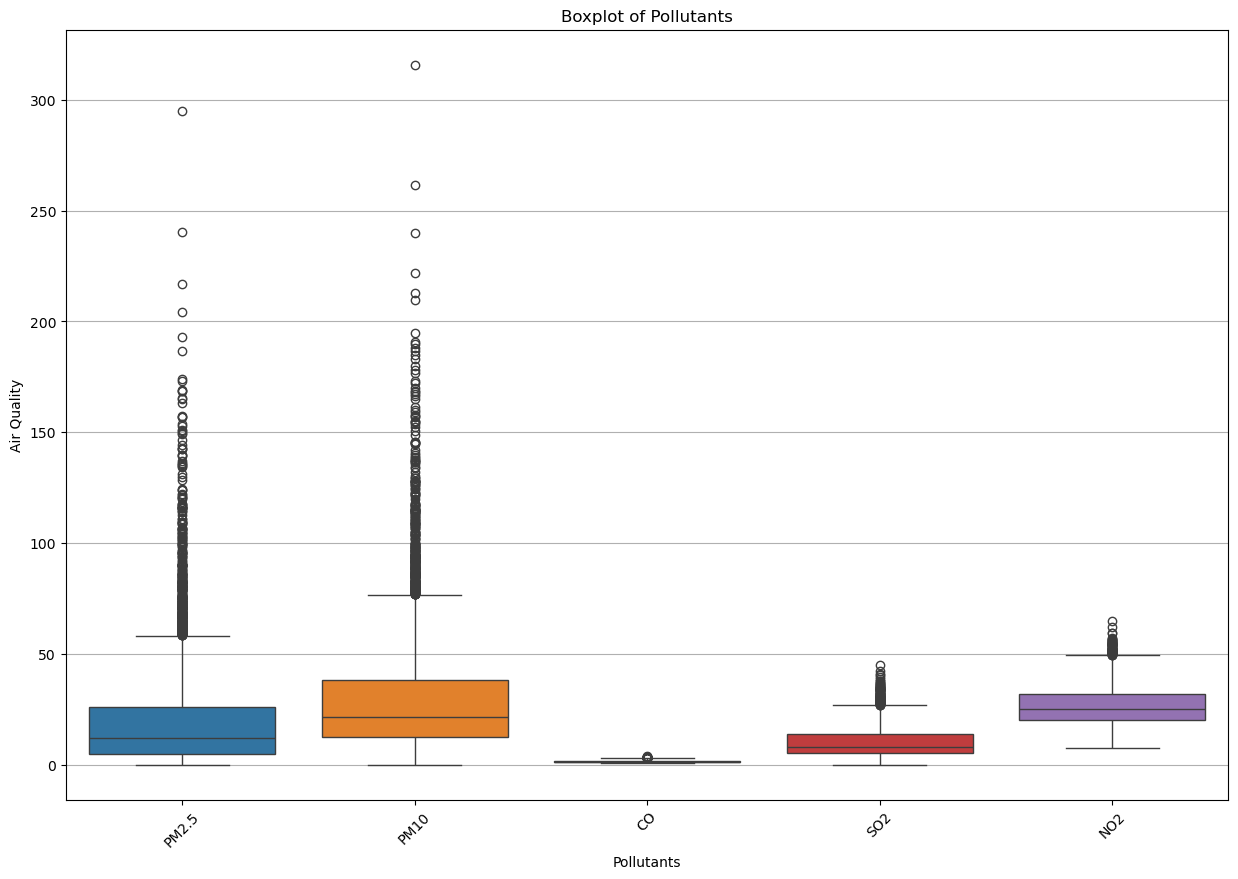

In [45]:
plt.figure(figsize=(15, 10))
# Visualization 2: Box Plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=pollution_df[['PM2.5', 'PM10', 'CO', 'SO2', 
              'NO2']])
plt.title('Boxplot of Pollutants')
plt.ylabel('Air Quality')
plt.xlabel('Pollutants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

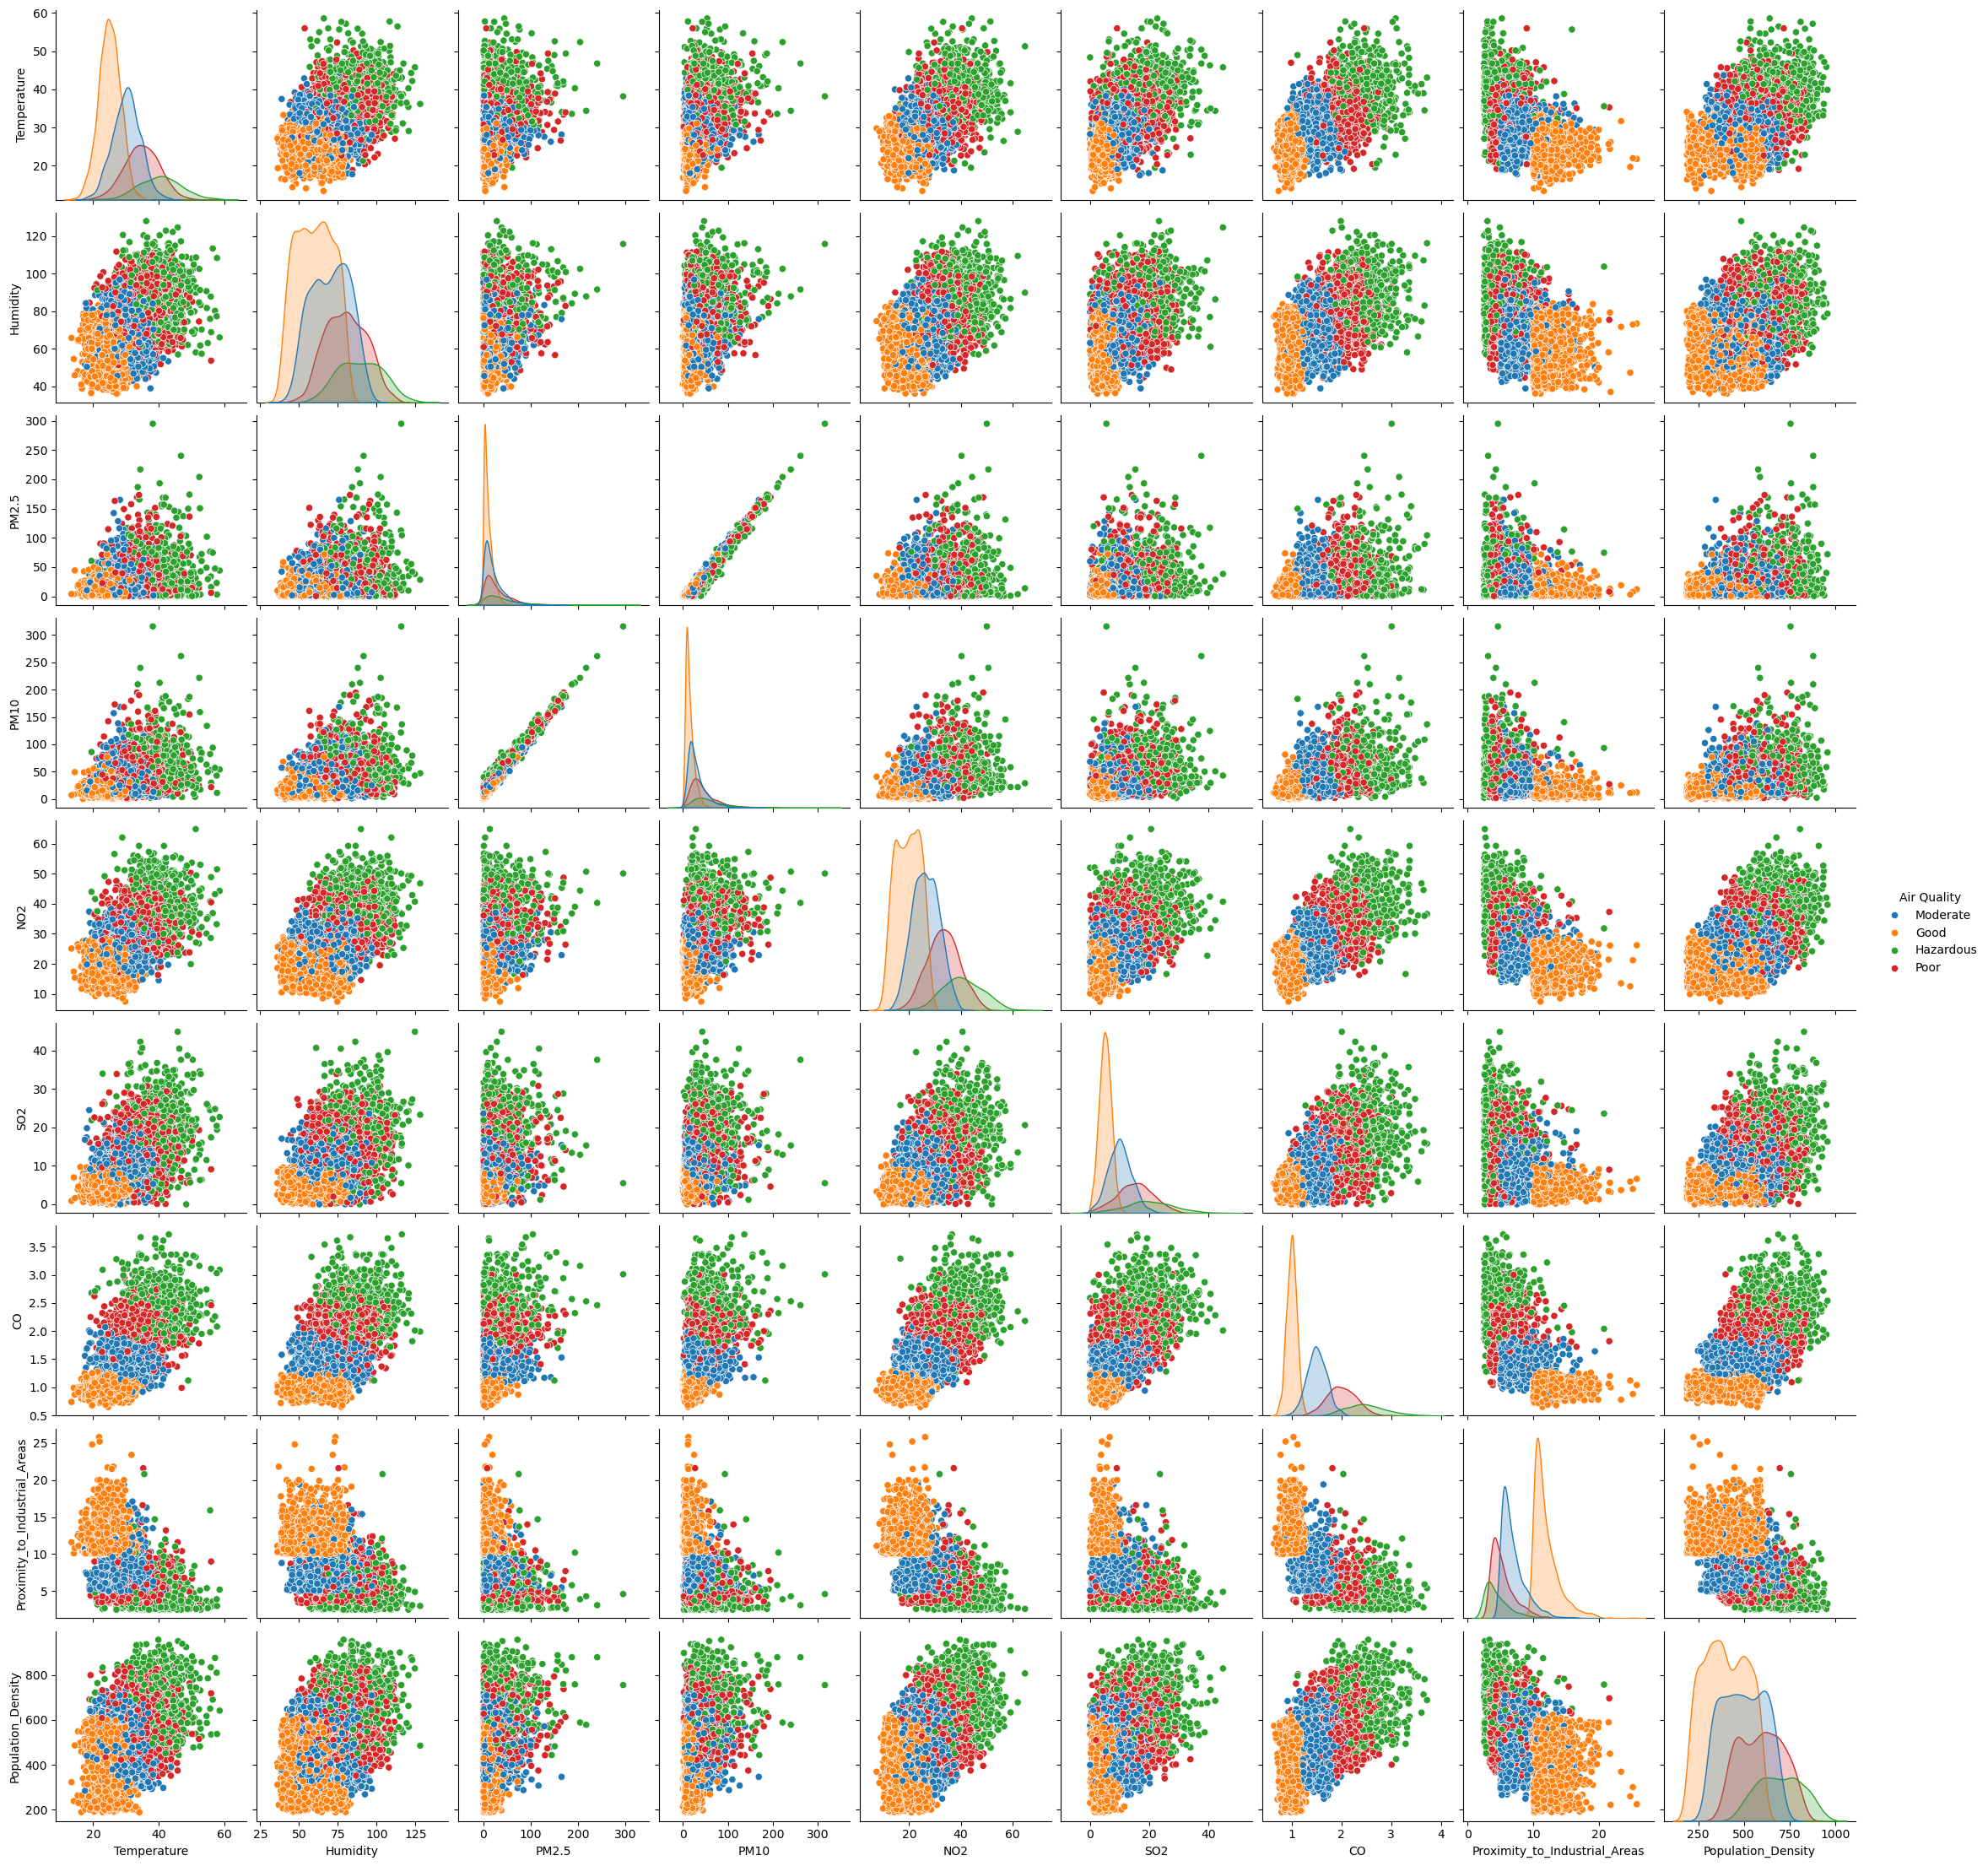

In [47]:
# Pairplot to look at the relationship between all attributes
sns.pairplot(pollution_df, hue='Air Quality', diag_kind='kde')

In [67]:
# map the air quality values to numerical values for classification purposes
air_quality_map = {
    'Hazardous' : 0,
    'Poor' : 1,
    'Moderate': 2,
    'Good' : 3
}
pollution_df.loc[:, 'Air Quality'] = pollution_df['Air Quality'].map(air_quality_map).fillna(-1).astype(int)

In [78]:
# Split Data into train and test
X = pollution_df.drop(columns = ['Air Quality'])
Y = pollution_df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1, stratify=Y)

## Classification: Random Forest

In [81]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.954

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.88      0.84      0.86       100
    Moderate       0.96      0.97      0.97       300
        Poor       0.89      0.89      0.89       200

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000


Confusion Matrix:
[[400   0   0   0]
 [  0  84   0  16]
 [  1   0 292   7]
 [  0  11  11 178]]


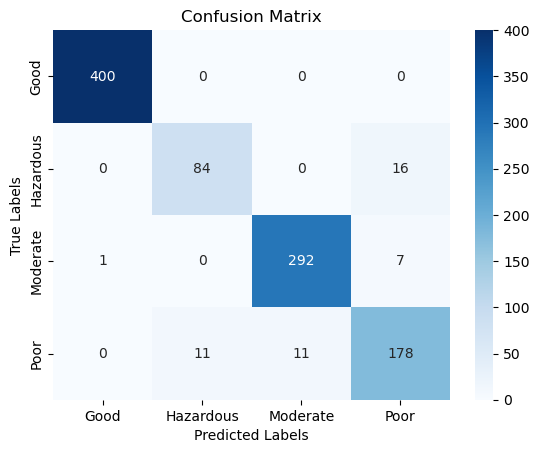

In [90]:
pred_y = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification: Logistic Regression

Accuracy: 0.948

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.82      0.87       111
    Moderate       0.96      0.96      0.96       294
        Poor       0.84      0.89      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
 [[409   0   0   0]
 [  0  91   0  20]
 [  0   0 283  11]
 [  0   8  13 165]]


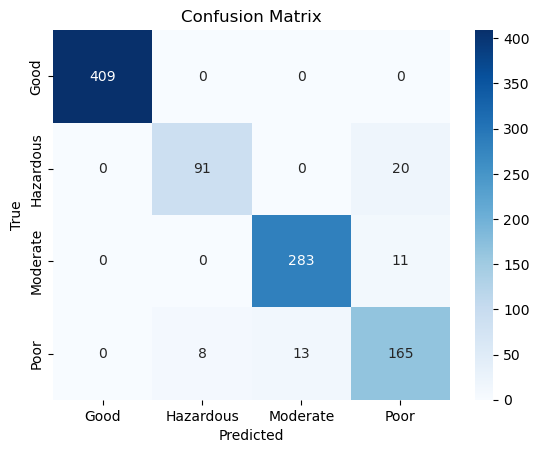

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cfm)

sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()